In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I2 = np.eye(2, dtype = complex)

#Parameters
t0, t, V=0, 1, 3
Nk = 201

kxs = np.linspace(-np.pi,np.pi, Nk)
kzs = np.linspace(-np.pi,np.pi, Nk)
XX, ZZ = np.meshgrid (kxs, kzs)

L = 30 #OBC in y-direction


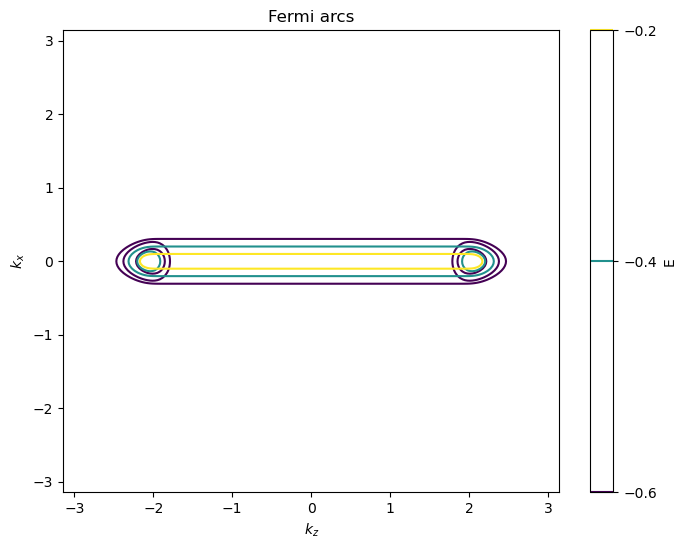

In [3]:
eigvals_oc_vs_kz = []

# Hamiltonian & diagonalization 
for kz in kzs:
    for kx in kxs:
        H0 = (-2*t0*np.sin(kx))*I2 +(2*t*np.sin(kx))* sigma_x + (2*t*np.cos(kz)+2*t*(np.cos(kx))-V)* sigma_z
        V0 = -1j*t * sigma_y -t*sigma_z
        
        H_open = np.zeros((2*L, 2*L), dtype=complex)
        for i in range(L):
            H_open[2*i:2*i+2, 2*i:2*i+2] = H0
            if i < L - 1:
                H_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V0
                H_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V0.conj().T
        eigenvals_oc, eigenvecs_oc = np.linalg.eigh(H_open)
        eigvals_oc_vs_kz.append(eigenvals_oc.real)

arr = np.array(eigvals_oc_vs_kz)
arr_reshaped = arr.reshape(len(kzs), len(kxs), 2*L)

near_zero_band = arr_reshaped[:, :, :]

# Plot
plt.figure(figsize=(8,6))
for band in range (2*L):
    plt.contour(ZZ, XX, arr_reshaped[:, :, band], [-0.6,-0.4,-0.2] )
plt.colorbar(label=f'E' )
plt.xlabel('$k_z$')
plt.ylabel('$k_x$')
plt.title('Fermi arcs')
plt.show()